In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081858 entries, 0 to 1081857
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1081858 non-null  int64  
 1   kWh       1081858 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 16.5 MB


In [4]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1081853    0.14
1081854    0.14
1081855    0.13
1081856    0.13
1081857    0.14
Name: kWh, Length: 1081858, dtype: float64

In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1081853    0.14
1081854    0.14
1081855    0.13
1081856    0.13
1081857    0.14
Name: kWh, Length: 1081858, dtype: float64

In [6]:
l=len(conso_data)-1
l

1081857

In [7]:
conso_data['sec']=conso_data['Interval']/1000


In [8]:
conso_data['Wh']=3600000/conso_data['Interval']


In [9]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [10]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081858 entries, 0 to 1081857
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1081858 non-null  int64  
 1   kWh        1081858 non-null  float64
 2   sec        1081858 non-null  float64
 3   Wh         1081858 non-null  float64
 4   cumul(ms)  1081858 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 41.3 MB


In [11]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1081853,26101,0.14,26.101,137.925750,24856113286
1081854,26204,0.14,26.204,137.383606,24856139490
1081855,26890,0.13,26.890,133.878765,24856166380
1081856,26987,0.13,26.987,133.397562,24856193367
1081857,26098,0.14,26.098,137.941605,24856219465


In [12]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

24856219465000

In [13]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 36, 20, 190546)

In [14]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [15]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [16]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [17]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:36:42.124546,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:37:03.982546,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:37:25.983546,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:37:47.911546,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:38:09.802546,21/08/23
...,...,...,...,...,...,...,...
1081853,26101,0.14,26.101,137.925750,24856113286,2024-06-04 11:04:53.476546,04/06/24
1081854,26204,0.14,26.204,137.383606,24856139490,2024-06-04 11:05:19.680546,04/06/24
1081855,26890,0.13,26.890,133.878765,24856166380,2024-06-04 11:05:46.570546,04/06/24
1081856,26987,0.13,26.987,133.397562,24856193367,2024-06-04 11:06:13.557546,04/06/24


In [18]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('04/06/24', 6, 2024)

In [19]:
here = now.strftime('%H:%M:%S')
here

'11:07:00'

In [20]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [21]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
1080423,25171,0.14,25.171,143.021731,24816241236,2024-06-04 00:00:21.426546,04/06/24
1080424,24548,0.15,24.548,146.651458,24816265784,2024-06-04 00:00:45.974546,04/06/24
1080425,24959,0.14,24.959,144.236548,24816290743,2024-06-04 00:01:10.933546,04/06/24
1080426,25605,0.14,25.605,140.597540,24816316348,2024-06-04 00:01:36.538546,04/06/24
1080427,25691,0.14,25.691,140.126893,24816342039,2024-06-04 00:02:02.229546,04/06/24
...,...,...,...,...,...,...,...
1081853,26101,0.14,26.101,137.925750,24856113286,2024-06-04 11:04:53.476546,04/06/24
1081854,26204,0.14,26.204,137.383606,24856139490,2024-06-04 11:05:19.680546,04/06/24
1081855,26890,0.13,26.890,133.878765,24856166380,2024-06-04 11:05:46.570546,04/06/24
1081856,26987,0.13,26.987,133.397562,24856193367,2024-06-04 11:06:13.557546,04/06/24


In [22]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [23]:
data = list(df_grp['kWh'])
print(data)


[0.905, 3.698, 4.217, 3.7, 4.213, 4.624, 3.48, 3.398, 3.527, 3.682, 3.848, 3.714, 4.257, 3.862, 3.413, 3.632, 3.324, 3.455, 4.236, 4.02, 4.062, 3.934, 3.43, 4.446, 3.699, 3.817, 4.424, 4.66, 3.716, 3.224, 3.175, 4.056, 3.621, 3.188, 3.79, 4.173, 3.745, 3.556, 4.818, 4.172, 4.533, 3.775, 3.377, 4.319, 3.881, 3.885, 3.427, 4.083, 3.646, 3.397, 4.11, 3.403, 3.895, 3.824, 3.648, 3.744, 4.245, 3.284, 3.886, 2.952, 2.056, 2.041, 2.485, 4.085, 3.742, 4.324, 3.64, 3.891, 3.746, 3.969, 3.924, 4.145, 3.664, 3.174, 3.756, 3.539, 3.597, 3.703, 3.689, 3.227, 3.908, 3.267, 3.748, 3.589, 4.103, 3.671, 3.26, 3.827, 4.117, 4.335, 4.09, 4.001, 4.21, 3.744, 3.932, 3.878, 3.909, 3.764, 4.023, 4.342, 3.875, 3.532, 3.669, 3.66, 3.339, 3.857, 3.985, 4.12, 3.464, 4.179, 3.607, 4.135, 4.484, 3.696, 3.408, 3.592, 4.208, 3.631, 4.081, 3.985, 3.752, 3.584, 5.146, 3.691, 3.766, 4.297, 4.083, 4.788, 4.395, 3.929, 3.818, 4.38, 4.614, 4.251, 4.778, 4.34, 3.658, 4.246, 3.684, 3.603, 3.528, 3.978, 3.628, 3.789, 3.591, 

In [24]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [25]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [26]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [27]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.314336
dtype: float64

In [28]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.743453
dtype: float64

In [29]:
last=df_grp.iloc[-1]['kWh']
last

1.435

<Axes: xlabel='heure'>

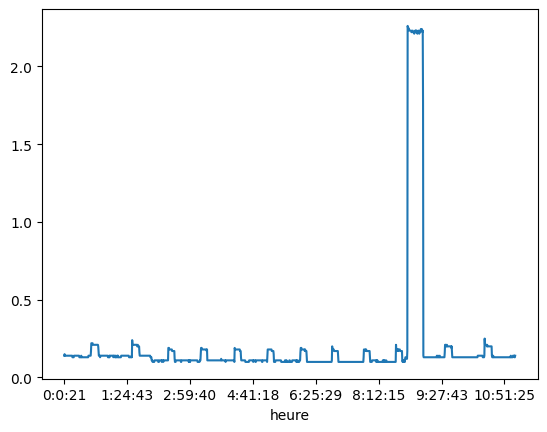

In [30]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()

In [31]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:21',
              days   kWh
  heure                 
  0:0:21  04/06/24  0.14),
 ('0:0:45',
              days   kWh
  heure                 
  0:0:45  04/06/24  0.15),
 ('0:1:10',
              days   kWh
  heure                 
  0:1:10  04/06/24  0.14),
 ('0:1:36',
              days   kWh
  heure                 
  0:1:36  04/06/24  0.14),
 ('0:2:2',
             days   kWh
  heure                
  0:2:2  04/06/24  0.14),
 ('0:2:27',
              days   kWh
  heure                 
  0:2:27  04/06/24  0.14),
 ('0:2:53',
              days   kWh
  heure                 
  0:2:53  04/06/24  0.14),
 ('0:3:19',
              days   kWh
  heure                 
  0:3:19  04/06/24  0.14),
 ('0:3:45',
              days   kWh
  heure                 
  0:3:45  04/06/24  0.14),
 ('0:4:10',
              days   kWh
  heure                 
  0:4:10  04/06/24  0.14),
 ('0:4:36',
              days   kWh
  heure                 
  0:4:36  04/06/24  0.14),
 ('0:5:2',
             d

In [32]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:21',
  heure
  0:0:21    0.14
  Name: kWh, dtype: float64),
 ('0:0:45',
  heure
  0:0:45    0.15
  Name: kWh, dtype: float64),
 ('0:1:10',
  heure
  0:1:10    0.14
  Name: kWh, dtype: float64),
 ('0:1:36',
  heure
  0:1:36    0.14
  Name: kWh, dtype: float64),
 ('0:2:2',
  heure
  0:2:2    0.14
  Name: kWh, dtype: float64),
 ('0:2:27',
  heure
  0:2:27    0.14
  Name: kWh, dtype: float64),
 ('0:2:53',
  heure
  0:2:53    0.14
  Name: kWh, dtype: float64),
 ('0:3:19',
  heure
  0:3:19    0.14
  Name: kWh, dtype: float64),
 ('0:3:45',
  heure
  0:3:45    0.14
  Name: kWh, dtype: float64),
 ('0:4:10',
  heure
  0:4:10    0.14
  Name: kWh, dtype: float64),
 ('0:4:36',
  heure
  0:4:36    0.14
  Name: kWh, dtype: float64),
 ('0:5:2',
  heure
  0:5:2    0.14
  Name: kWh, dtype: float64),
 ('0:5:28',
  heure
  0:5:28    0.14
  Name: kWh, dtype: float64),
 ('0:5:55',
  heure
  0:5:55    0.14
  Name: kWh, dtype: float64),
 ('0:6:21',
  heure
  0:6:21    0.14
  Name: kWh, dtype: float64),

In [33]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [34]:
df.iloc[0].dates

Timestamp('2024-06-04 00:00:21.426546')

In [35]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [36]:
df.dates.dt.time

heure
0:0:21     00:00:21.426546
0:0:45     00:00:45.974546
0:1:10     00:01:10.933546
0:1:36     00:01:36.538546
0:2:2      00:02:02.229546
                ...       
11:4:53    11:04:53.476546
11:5:19    11:05:19.680546
11:5:46    11:05:46.570546
11:6:13    11:06:13.557546
11:6:39    11:06:39.655546
Name: dates, Length: 1435, dtype: object

In [37]:
for p in range(1,6):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-06-04 00:00:21.426546	2024-06-04 08:11:40.951546	8h 11m 19s 	1000
2024-06-04 08:11:40.951546	2024-06-04 11:06:39.655546	2h 54m 58s 	435


In [38]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('11:07:00', 1.435, 1435)

In [39]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [40]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 21/08/23 to 04/06/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     289 non-null    float64
dtypes: float64(1)
memory usage: 4.5+ KB


In [41]:
df_grp.to_csv('df_grp.csv')

In [42]:
df_grp.tail(7)

,kWh
days,
29/05/24,3.092
30/05/24,3.286
31/05/24,4.152
01/06/24,3.603
02/06/24,4.448
03/06/24,3.379
04/06/24,1.435


Text(0.5, 1.0, 'Week conso')

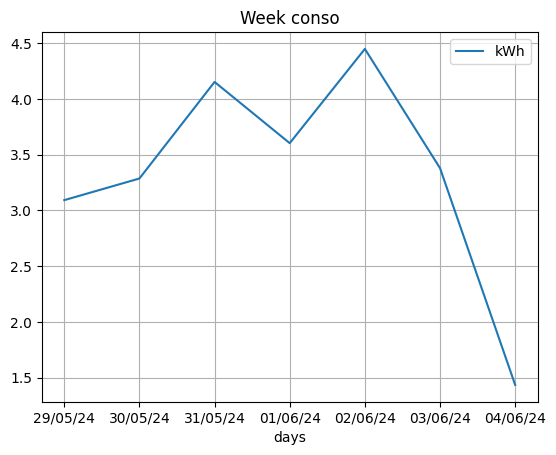

In [43]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')

In [44]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [45]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


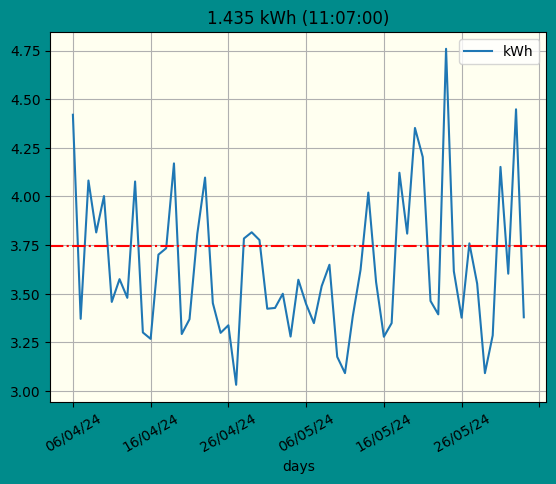

In [46]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")
# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [47]:
#df_grp.head()
df_grp.tail(7)

,kWh
days,
29/05/24,3.092
30/05/24,3.286
31/05/24,4.152
01/06/24,3.603
02/06/24,4.448
03/06/24,3.379
04/06/24,1.435


In [48]:
df_grp.mean()

kWh    3.743453
dtype: float64

In [49]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 1080423 to 1081857
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1435 non-null   int64         
 1   kWh        1435 non-null   float64       
 2   sec        1435 non-null   float64       
 3   Wh         1435 non-null   float64       
 4   cumul(ms)  1435 non-null   int64         
 5   dates      1435 non-null   datetime64[ns]
 6   days       1435 non-null   object        
 7   heure      1435 non-null   object        
 8   hours      1435 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 112.1+ KB


In [50]:
day

'04/06/24'

In [51]:

# group conso by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1080423    00  0.14
  1080424    00  0.15
  1080425    00  0.14
  1080426    00  0.14
  1080427    00  0.14
  ...       ...   ...
  1080562    00  0.13
  1080563    00  0.13
  1080564    00  0.13
  1080565    00  0.13
  1080566    00  0.14
  
  [144 rows x 2 columns]),
 ('01',
          hours   kWh
  1080567    01  0.13
  1080568    01  0.14
  1080569    01  0.14
  1080570    01  0.14
  1080571    01  0.14
  ...       ...   ...
  1080704    01  0.10
  1080705    01  0.10
  1080706    01  0.10
  1080707    01  0.10
  1080708    01  0.10
  
  [142 rows x 2 columns]),
 ('02',
          hours   kWh
  1080709    02  0.10
  1080710    02  0.11
  1080711    02  0.11
  1080712    02  0.11
  1080713    02  0.11
  ...       ...   ...
  1080819    02  0.10
  1080820    02  0.11
  1080821    02  0.10
  1080822    02  0.11
  1080823    02  0.10
  
  [115 rows x 2 columns]),
 ('03',
          hours   kWh
  1080824    03  0.11
  1080825    03  0.11
  1080826    03  0.1

In [52]:
groupedbyhour.count()

,kWh
hours,
00,144
01,142
02,115
03,117
04,116
05,114
06,118
07,113
08,147


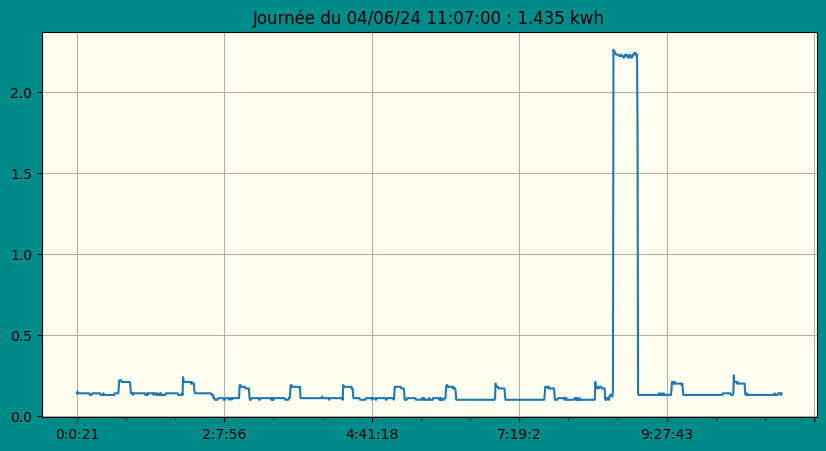

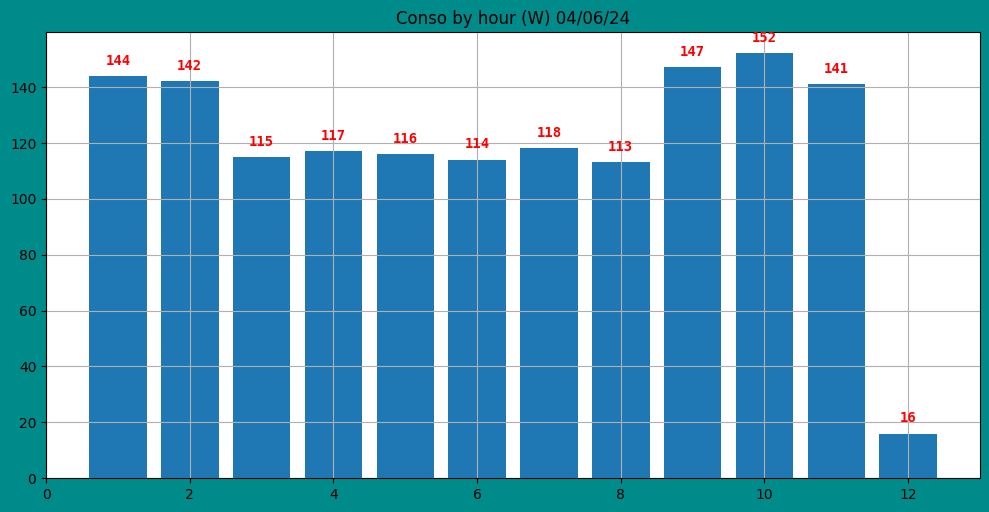

In [53]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(10, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [54]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

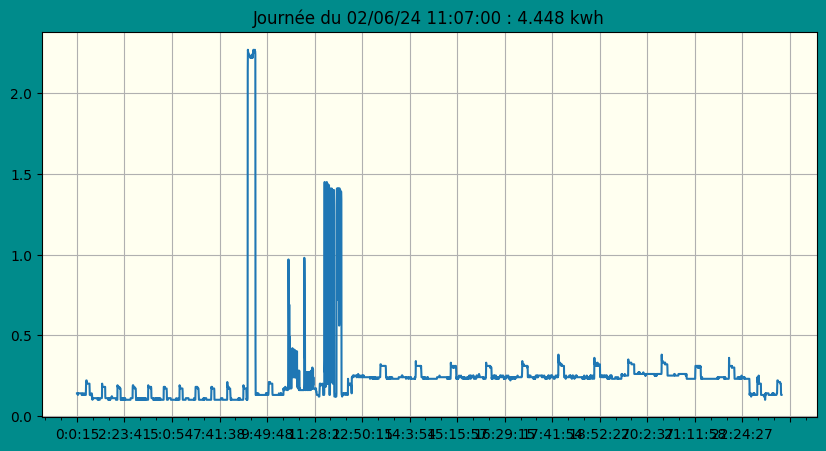

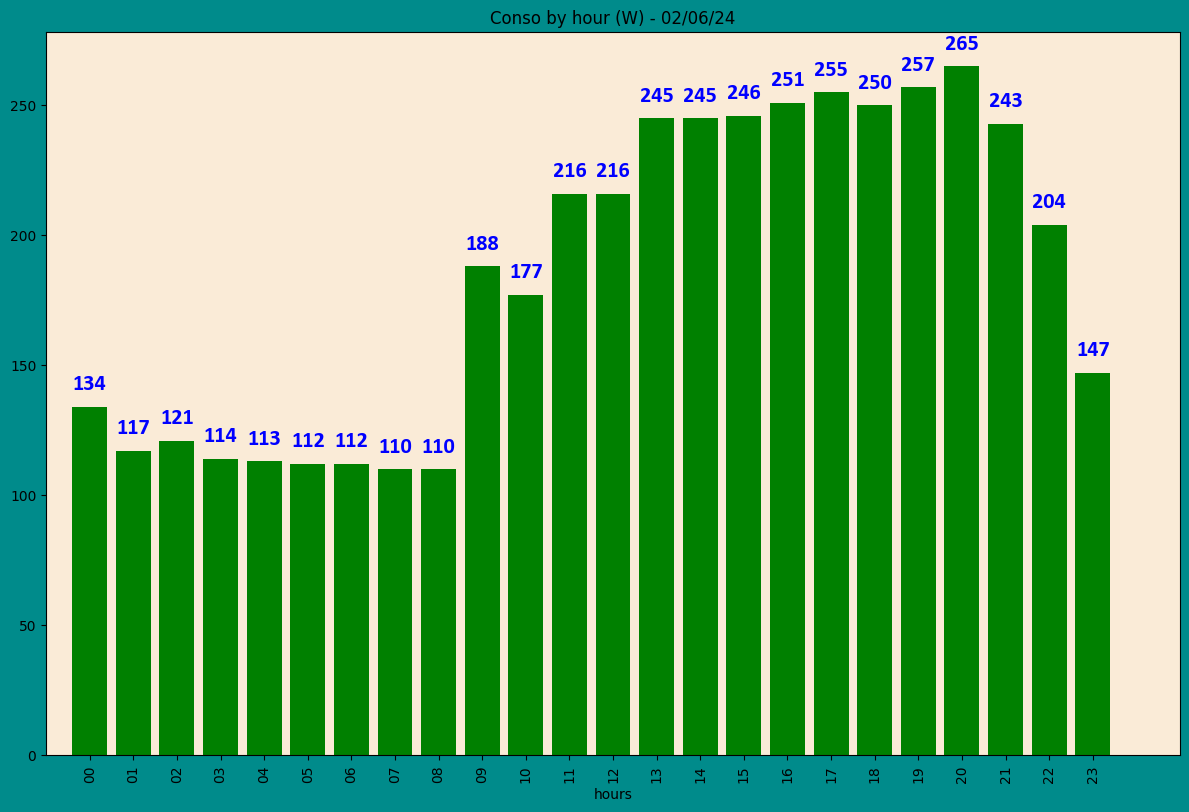

In [55]:
# plot any day
day = '02/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)